In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_casosCovidDiario_br = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Trabalhos - Pós Ciência de Dados - UEA/4. Aquisição, pré-processamento e exploração de dados/Trabalho Google Trends + Covid/dados/Covid + trend diário Brasil - normalizado.csv', index_col=0)

In [63]:
df_casosCovidDiario_br

,date,covid,coronavirus,new_confirmed,new_deaths,new_confirmed_n,new_deaths_n
0,2020-01-01,0,0,0,0,0.000000,0.000000
1,2020-01-02,0,0,0,0,0.000000,0.000000
2,2020-01-03,0,0,0,0,0.000000,0.000000
3,2020-01-04,0,0,0,0,0.000000,0.000000
4,2020-01-05,0,0,0,0,0.000000,0.000000
...,...,...,...,...,...,...,...
412,2021-02-16,68,58,65284,1092,72.724437,71.984179
413,2021-02-17,61,53,47225,1189,52.607247,78.378378
414,2021-02-18,62,45,50634,1439,56.404772,94.858273
415,2021-02-19,69,53,55002,1331,61.270595,87.738958


In [5]:
df_casosCovidDiario_br.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 416
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             417 non-null    object 
 1   covid            417 non-null    int64  
 2   coronavirus      417 non-null    int64  
 3   new_confirmed    417 non-null    int64  
 4   new_deaths       417 non-null    int64  
 5   new_confirmed_n  417 non-null    float64
 6   new_deaths_n     417 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 26.1+ KB


In [6]:
df_casosCovidDiario_br['date'] = pd.to_datetime(df_casosCovidDiario_br['date'])

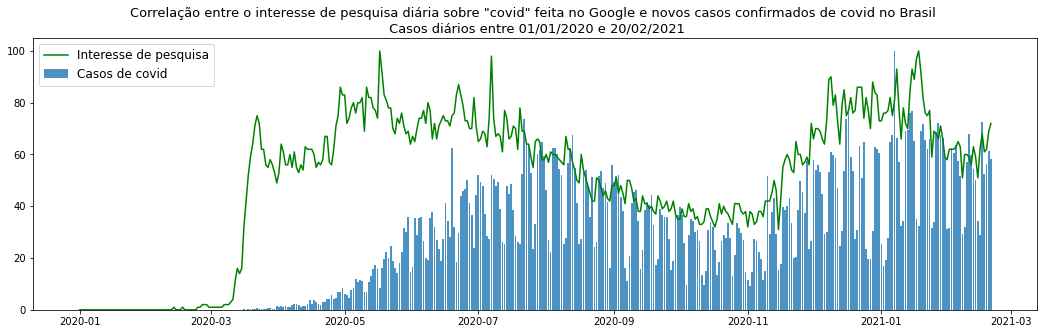

In [59]:
fig, axs = plt.subplots(1, 1, figsize=(18,5), sharey=True)
axs.bar(df_casosCovidDiario_br['date'],df_casosCovidDiario_br['new_confirmed_n'], alpha=0.8, label='Casos de covid')
axs.plot(df_casosCovidDiario_br['date'],df_casosCovidDiario_br['covid'], 'g', label='Interesse de pesquisa')
axs.set_title('Correlação entre o interesse de pesquisa diária sobre "covid" feita no Google e novos casos confirmados de covid no Brasil \n Casos diários entre 01/01/2020 e 20/02/2021', fontsize=13)
axs.legend(fontsize=12)
fig.show()

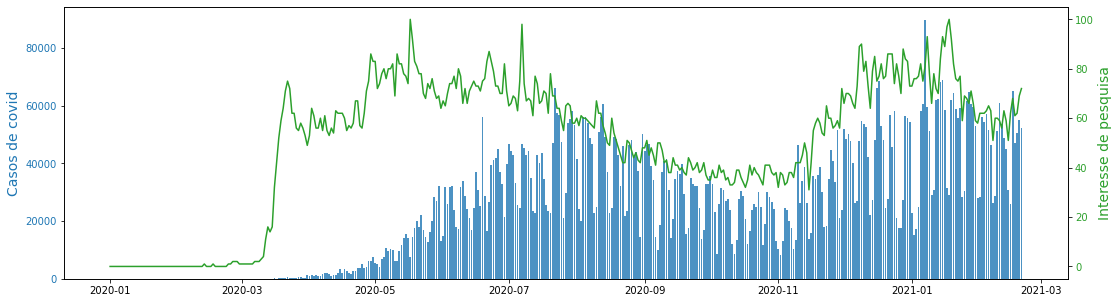

In [114]:
fig, ax1 = plt.subplots(1, 1, figsize=(18,5), sharey=True)
color = 'tab:blue'
ax1.bar(df_casosCovidDiario_br['date'],df_casosCovidDiario_br['new_confirmed'], alpha=0.8, label='Casos de covid', color=color)
ax1.set_ylabel('Casos de covid', color=color, fontsize=14)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Interesse de pesquisa', color=color, fontsize=14)
ax2.tick_params(axis='y', labelcolor=color)
ax2.plot(df_casosCovidDiario_br['date'],df_casosCovidDiario_br['covid'], 'g', label='Interesse de pesquisa', color=color)
fig.show()